# Lotka-Volterra: Predator–Prey Model

Parsimonious model about predator-prey dynamics.


## Equations

$$\frac{dx}{dt} = ax - \beta xy$$

$$\frac{dy}{dt} = \delta x y - \gamma y$$

$x$ is the number of prey (for example, rabbits)

$y$ is the number of some predator (for example, foxes)

$t$ represents time

$\frac{dx}{dt}$ instantaneous growth rate of prey

$\frac{dy}{dt}$ instantaneous growth rate of predator

$\alpha$ natural prey birth rate in the absence of predation

$\beta$ prey death rate due to predation 

$\delta$ predator birth rate (or efficiency of turning prey flesh into predators, or how many caught prey result into a new predator)

$\gamma$ natural predator death rate in the absence of food (prey)

If we discretize the equations (meaning that we deal with a finite amount of time instead of an instant), so that $dt$ becomes $\Delta t$, then the right hand side of the equations represent change (increment or decrement) of the prey and predator in the specified finite amount of time (e.g. 1 day). So, that:

$$dx = (ax - \beta xy) \; \Delta t$$

represents the change of prey. In order to find the total number of prey at time $t$ we simply need to add (if the change is negative, then we are subtracting instead of adding) this change to the existing quantity of prey:

$$x_t = x_{t-1} + (ax_{t-1} - \beta x_{t-1}y_{t-1}) \; \Delta t$$



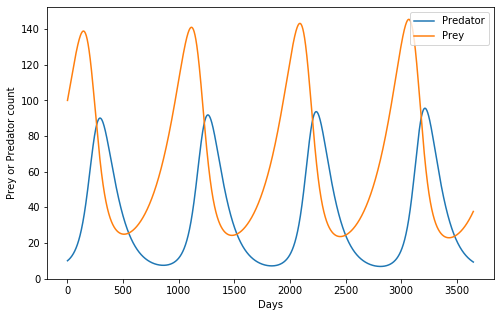

In [1]:
import matplotlib.pyplot as plt

# Initial count
prey = [100]
predator = [10]

# Initial prey and predator parameters
prey_birth_rate = 0.005        # alpha Births per day
prey_death_rate = 0.00015      # Deaths per day
predator_birth_rate = 0.00015  # Births per day. If value is too high predators will quickly dominate prey
predator_death_rate = 0.01     # Deaths per day. When there is no food predators should die quickly, to let the prey recover

# Time parameters
delta_time = 1     # 1 day
total_time = 3650  # 10 years

for t in range(1, total_time):
    updated_prey = max(prey[t-1] + delta_time * (prey_birth_rate * prey[t-1]  - prey_death_rate * prey[t-1] * predator[t-1]), 0)    
    updated_predator = max(predator[t-1] + delta_time * (predator_birth_rate * predator[t-1] * prey[t-1] - predator_death_rate * predator[t-1]), 0)
    prey.append(updated_prey)
    predator.append(updated_predator)
    
time_points = range(total_time)
plt.figure(figsize=(8,5))
plt.plot(time_points, predator)  
plt.plot(time_points, prey) 
plt.xlabel('Days')
plt.ylabel('Prey or Predator count')
plt.legend(['Predator','Prey'])
plt.rcParams["legend.edgecolor"] = 'w'
plt.show()


## References

Lotka, A.J., 1926. Elements of physical biology. Science Progress in the Twentieth Century (1919-1933), 21(82), pp.341-343.

Volterra, V., 1927. Variazioni e fluttuazioni del numero d'individui in specie animali conviventi (p. 142). C. Ferrari.

You can also learn more at <https://www.wikiwand.com/en/Lotka%E2%80%93Volterra_equations>